In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tit_train = pd.read_csv('C:\\Users\\Chris\\Desktop\\Python Learning\\DataSets\\titanic\\train.csv')
tit_test = pd.read_csv('C:\\Users\\Chris\\Desktop\\Python Learning\\DataSets\\titanic\\test.csv')
gs = pd.read_csv('C:\\Users\\Chris\\Desktop\\Python Learning\\DataSets\\titanic\\gender_submission.csv')


In [4]:
print(tit_train.shape)
tit_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tit_test = tit_test.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1)
tit_test = tit_test.fillna(method = 'ffill')
dummy_test = pd.get_dummies(tit_test[['Embarked', 'Sex']], drop_first = True)
x_test = tit_test.join(dummy_test)
x_test = x_test.drop(['Sex', 'Embarked'], axis = 1)


In [6]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Sex_male      418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [7]:
y_test = gs['Survived']

In [8]:
tit_train = tit_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1)
tit_train = tit_train.fillna(method = 'ffill')
dummy_train = pd.get_dummies(tit_train[['Embarked', 'Sex']], drop_first = True)
tit_train = tit_train.join(dummy_train)
tit_train = tit_train.drop(['Sex', 'Embarked'], axis = 1)

In [9]:
tit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Sex_male      891 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [10]:
tit_train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
Survived,1.000000,-0.338481,-0.065571,-0.035322,0.081629,0.257307,0.008660,-0.155660,-0.543351
Pclass,-0.338481,1.000000,-0.291157,0.083081,0.018443,-0.549500,0.213504,0.081720,0.131900
Age,-0.065571,-0.291157,1.000000,-0.206104,-0.165191,0.083417,0.027201,-0.030168,0.058415
SibSp,-0.035322,0.083081,-0.206104,1.000000,0.414838,0.159651,-0.028085,0.070941,-0.114631
Parch,0.081629,0.018443,-0.165191,0.414838,1.000000,0.216225,-0.082636,0.063036,-0.245489
Fare,0.257307,-0.549500,0.083417,0.159651,0.216225,1.000000,-0.112712,-0.166603,-0.182333
Embarked_Q,0.008660,0.213504,0.027201,-0.028085,-0.082636,-0.112712,1.000000,-0.500146,-0.079067
Embarked_S,-0.155660,0.081720,-0.030168,0.070941,0.063036,-0.166603,-0.500146,1.000000,0.125722
Sex_male,-0.543351,0.131900,0.058415,-0.114631,-0.245489,-0.182333,-0.079067,0.125722,1.000000


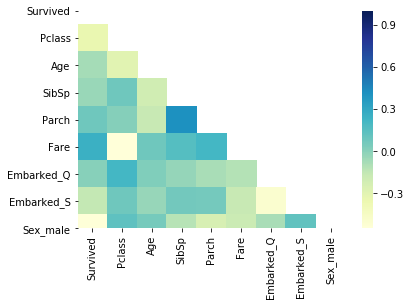

In [11]:
sns.heatmap(tit_train.corr(), mask = np.triu(np.ones_like(tit_train.corr(), dtype = bool)), cmap="YlGnBu")

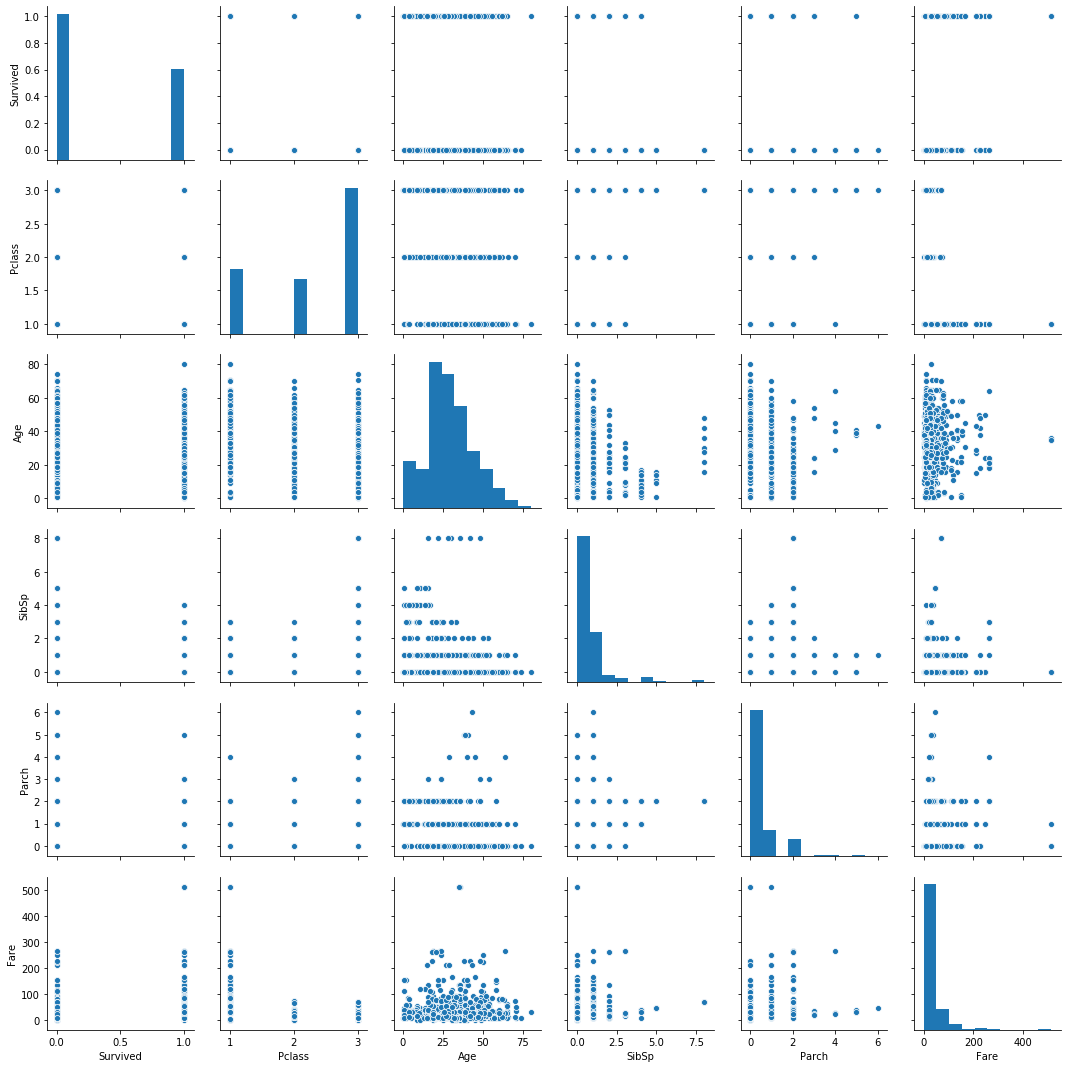

In [15]:
sns.pairplot(tit_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']])

In [12]:
y_train = tit_train['Survived']
x_train = tit_train.drop(['Survived'], axis = 1)

# Logistic Regression - Normal

In [13]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
log_cr = classification_report(y_test, log_pred)
log_cm = confusion_matrix(y_test, log_pred)
log_acc = log.score(x_test, y_test)
print("Logistic Regression Accuracy score: {0:.2f}%".format(log_acc*100))
print("Logistic Regression Confusion Matrix\n", log_cm)

Logistic Regression Accuracy score: 95.22%
Logistic Regression Confusion Matrix
 [[256  10]
 [ 10 142]]


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Logistic Regression After removing Outliers

In [14]:
q1 = tit_train[tit_train['Parch']<tit_train.quantile(0.99)['Parch']]
q2 = q1[q1["SibSp"]<tit_train.quantile(0.97)['SibSp']]
q3 = q2[q2['Fare']<tit_train.quantile(0.99)['Fare']]
Y_train = q3['Survived']
X_train = q3.drop(['Survived'], axis = 1)

In [15]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, Y_train)
log_pred = log.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
log_cr = classification_report(y_test, log_pred)
log_cm = confusion_matrix(y_test, log_pred)
log_acc = log.score(x_test, y_test)
print("Logistic Regression Accuracy score: {0:.2f}%".format(log_acc*100))
print("Logistic Regression Confusion Matrix\n", log_cm)

Logistic Regression Accuracy score: 97.13%
Logistic Regression Confusion Matrix
 [[258   8]
 [  4 148]]


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
